In [1]:
import glob
import os
import pickle

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
WIN = 'D:/'
MAC = '/Volumes/Transcend2/'

osp = MAC

### Extracting the standards from the mzmine peak picked files

In [40]:
from metab_utils import get_std_matches_for_files

stds_dir = osp+'Metabolomics_datasets/Standards_csv'
output_dir = osp+'pymz/mzmine/221119/standards'
original_files = glob.glob(os.path.join(stds_dir,'*.csv'))
original_files = [o.split(os.sep)[-1].split('.')[0] for o in original_files]
original_files = ['_'.join(o.split('_')[0:4]) for o in original_files]

original_csvs = [os.path.join(output_dir,original_file + '_pp.csv') for original_file in original_files]

matches = {}
stds_csvs = glob.glob(os.path.join(stds_dir, '*.csv'))  

matches = get_std_matches_for_files(original_files, output_dir, stds_csvs, original_csvs)

In [41]:
matches

{'serotonin': {'Mal_Std1_1_20Dec16': (1754,
   177.1023178100586,
   4.0217,
   3782182.2901406214),
  'Hat_Std1_2_20150130': (766,
   177.10223388671875,
   12.525366666666667,
   258932758.81113324),
  'Hat_Std1_1_20150130': (874,
   177.10223388671875,
   12.457600000000001,
   305546767.65958226)},
 'melatonin': {'Mal_Std1_1_20Dec16': (2490,
   233.12831115722656,
   4.3155833333333335,
   33276196048.949608),
  'Mal_Std1_2_20Dec16': (2584,
   233.12832641601562,
   4.302533333333333,
   33772812929.161053),
  'VL_Std1_1_06Mar18': (3230,
   233.1283416748047,
   4.251833333333334,
   25597167515.199986),
  'VL_Std1_2_06Mar18': (2853,
   233.12835693359375,
   4.288749999999999,
   19683997207.912857),
  'Zik_Std1_1_23Oct18': (2668,
   233.12841796875,
   4.091466666666666,
   38876808977.52192),
  'Zik_Std1_2_23Oct18': (2884, 233.1283721923828, 4.0523, 40561910106.74934),
  'Hat_Std1_2_20150130': (1055,
   233.1282958984375,
   5.982183333333333,
   3113367445.117812),
  'Hat_Std1_

Save the dictionary of matching metabolites.

In [47]:
with open(osp+'pymz/mzmine/std_matches.txt', 'wb') as handle:
    pickle.dump(matches, handle)

Or...load the dictionary of matching metabolites.

In [11]:
import pickle
with open(osp+'pymz/mzmine/std_matches.txt', 'rb') as file:
    matches = pickle.load(file)

### Comparing the retention times within the datasets

In [5]:
from metab_utils import get_stats_on_diff
from metab_utils import get_rts_within_datasets

Mean: -2.28 
SD: 36.57
Maximum difference: 338.23


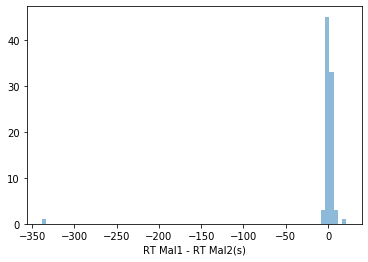

In [36]:
mal_1_rt, mal_2_rt, mal1_mal2_diff = get_rts_within_datasets('mal', matches)
get_stats_on_diff(mal_1_rt, 'Mal1', mal_2_rt, 'Mal2', mal1_mal2_diff, 5, 20)

Mean: 0.38 
SD: 6.73
Maximum difference: 57.40


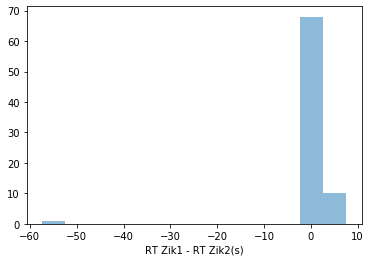

In [38]:
zik_1_rt, zik_2_rt, zik1_zik2_diff = get_rts_within_datasets('zik', matches)
get_stats_on_diff(zik_1_rt, 'Zik1', zik_2_rt, 'Zik2', zik1_zik2_diff, 5, 20)

Mean: 3.65 
SD: 25.02
Maximum difference: 224.78


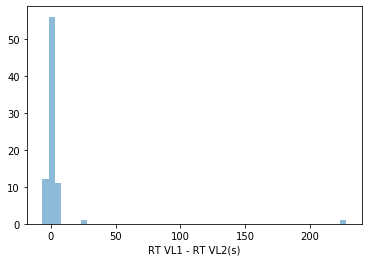

In [44]:
vl_1_rt, vl_2_rt, vl1_vl2_diff = get_rts_within_datasets('vl', matches)
get_stats_on_diff(vl_1_rt, 'VL1', vl_2_rt, 'VL2', vl1_vl2_diff, 5, 20)

Mean: -2.36 
SD: 4.55
Maximum difference: 29.99


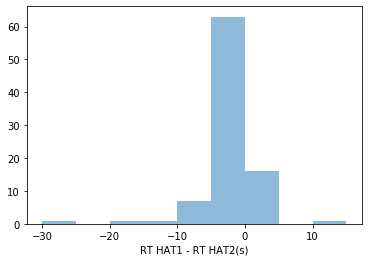

In [43]:
hat_1_rt, hat_2_rt, hat1_hat2_diff = get_rts_within_datasets('hat', matches)
get_stats_on_diff(hat_1_rt, 'HAT1', hat_2_rt, 'HAT2', hat1_hat2_diff, 5, 20)

### Comparing the retention times between the datasets

In [45]:
from metab_utils import get_rts_between_datasets

#### Zika vs Malaria 

Mean: -19.75 
SD: 41.64
Maximum difference: 319.74


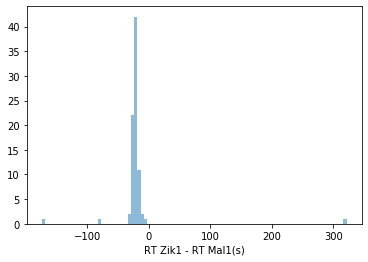

In [42]:
zik_1_rt, mal_1_rt, zik1_mal1_diff = get_rts_between_datasets('zik', 'mal', matches)
get_stats_on_diff(zik_1_rt, 'Zik1', mal_1_rt, 'Mal1', zik1_mal1_diff, 5, 20)

#### Zika vs VL

Mean: -112.03 
SD: 84.78
Maximum difference: 252.54


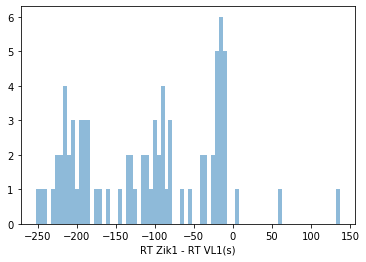

In [43]:
zik_1_rt, vl_1_rt, zik1_vl1_diff = get_rts_between_datasets('zik', 'vl', matches)
get_stats_on_diff(zik_1_rt, 'Zik1', vl_1_rt, 'VL1', zik1_vl1_diff, 5, 20)

#### Zika vs HAT

Mean: -139.12 
SD: 119.25
Maximum difference: 443.91


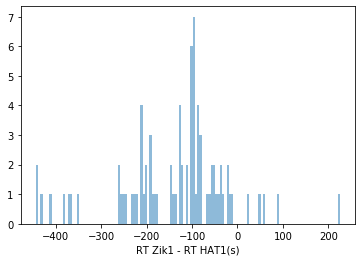

In [46]:
zik_1_rt, hat_1_rt, zik1_hat1_diff = get_rts_between_datasets('zik', 'hat', matches)
get_stats_on_diff(zik_1_rt, 'Zik1', hat_1_rt, 'HAT1', zik1_hat1_diff, 5, 20)